In [20]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd
import operator

In [25]:
nations = ['Italy','England','Germany','France','Spain','European_Championship','World_Cup']

events = {}
for nation in nations:
    with open('../Data/events/events_%s.json' %nation) as json_data:
        events[nation] = json.load(json_data)
        
matches = {}
for nation in nations:
    with open('../Data/matches/matches_%s.json' %nation) as json_data:
        matches[nation] = json.load(json_data)

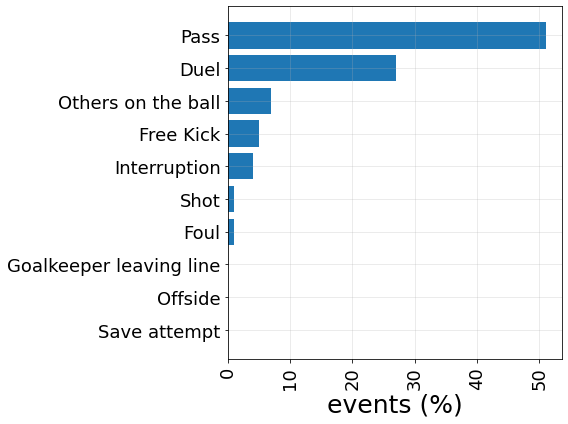

In [3]:
eventsByNation = []
for nation in nations:
    for i in range(len(events[nation])):
        eventsByNation.append(events[nation][i]['eventName'])

count = Counter(eventsByNation)
counter = {}
for i, v in zip(count.keys(), count.values()):
    counter[i] = int(float(v)/len(eventsByNation)*100)
sorted_d = np.array(sorted(counter.items(), key=operator.itemgetter(1), reverse=False))

#bar plot
f,ax = plt.subplots(figsize=(8,6))
plt.barh(list(sorted_d[:,0]),[int(x) for x in list(sorted_d[:,1])])
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.xlabel('events (%)', fontsize=25)
plt.yticks(fontsize=18)
plt.grid(alpha=0.3)
f.tight_layout()
plt.show()


In [12]:
for key, val in zip(count.keys(), count.values()):
    print("%s: %d" %(key, val))

Pass: 1665508
Others on the ball: 257240
Duel: 879083
Foul: 51049
Free Kick: 193273
Interruption: 130097
Shot: 43078
Save attempt: 17619
Offside: 8182
Goalkeeper leaving line: 6165


In [40]:
# eventsByNation

In [41]:
# events

In [21]:
def pitch():
    """
    code to plot a soccer pitch 
    """
    #create figure
    fig,ax=plt.subplots(figsize=(7,5))
    
    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,100], color="black")
    plt.plot([0,100],[100,100], color="black")
    plt.plot([100,100],[100,0], color="black")
    plt.plot([100,0],[0,0], color="black")
    plt.plot([50,50],[0,100], color="black")

    #Left Penalty Area
    plt.plot([16.5,16.5],[80,20],color="black")
    plt.plot([0,16.5],[80,80],color="black")
    plt.plot([16.5,0],[20,20],color="black")

    #Right Penalty Area
    plt.plot([83.5,100],[80,80],color="black")
    plt.plot([83.5,83.5],[80,20],color="black")
    plt.plot([83.5,100],[20,20],color="black")

    #Left 6-yard Box
    plt.plot([0,5.5],[65,65],color="black")
    plt.plot([5.5,5.5],[65,35],color="black")
    plt.plot([5.5,0.5],[35,35],color="black")

    #Right 6-yard Box
    plt.plot([100,94.5],[65,65],color="black")
    plt.plot([94.5,94.5],[65,35],color="black")
    plt.plot([94.5,100],[35,35],color="black")

    #Prepare Circles
    centreCircle = Ellipse((50, 50), width=30, height=39, edgecolor="black", facecolor="None", lw=1.8)
    centreSpot = Ellipse((50, 50), width=1, height=1.5, edgecolor="black", facecolor="black", lw=1.8)
    leftPenSpot = Ellipse((11, 50), width=1, height=1.5, edgecolor="black", facecolor="black", lw=1.8)
    rightPenSpot = Ellipse((89, 50), width=1, height=1.5, edgecolor="black", facecolor="black", lw=1.8)

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #limit axis
    plt.xlim(0,100)
    plt.ylim(0,100)
    
    ax.annotate("", xy=(25, 5), xytext=(5, 5),
                arrowprops=dict(arrowstyle="->", linewidth=2))
    ax.text(7,7,'Attack',fontsize=20)
    return fig,ax

(<Figure size 504x360 with 1 Axes>, <AxesSubplot:>)

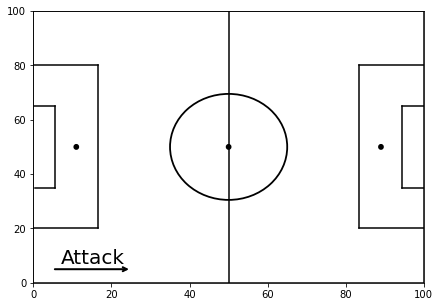

In [22]:
pitch()

In [27]:
def draw_pitch(pitch, line, orientation, view):
    """
    Draw a soccer pitch given the pitch, the orientation, the view and the line
    
    Parameters
    ----------
    pitch
    
    """
    orientation = orientation
    view = view
    line = line
    pitch = pitch
    
    if orientation.lower().startswith("h"):
        
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
    
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(93,34,color=line,zorder=5)
        plt.scatter(11,34,color=line,zorder=5)
        plt.scatter(52,34,color=line,zorder=5)

        circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)

        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks

        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)

        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)


        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)

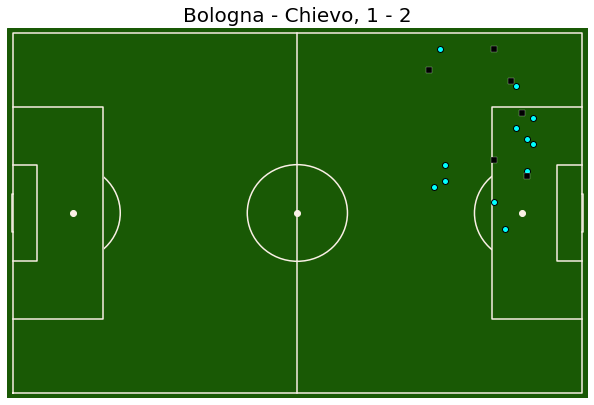

In [37]:
match_id = 2576320

a_match = []
for nation in nations:
    for ev in events[nation]:
        if ev['matchId'] == match_id:
            a_match.append(ev)
            
for nation in nations:
    for match in matches[nation]:
        if match['wyId'] == match_id:
            match_f = match
            
df_a_match = pd.DataFrame(a_match)
team_1, team_2 = np.unique(df_a_match['teamId'])
df_a_match['x'] = [x[0]['x'] for x in df_a_match['positions']]
df_a_match['y'] = [x[0]['y'] for x in df_a_match['positions']]
df_team_1 = df_a_match[df_a_match['teamId'] == team_1]
df_team_2 = df_a_match[df_a_match['teamId'] == team_2]
df_team_1_shots = df_team_1[df_team_1["eventName"] == "Shot"]
df_team_2_shots = df_team_2[df_team_2["eventName"] == "Shot"]


f = draw_pitch("#195905", "#faf0e6", "h", "full")
plt.scatter(df_team_1_shots['x'], df_team_1_shots['y'], c='cyan', edgecolors="k", zorder=12)
plt.scatter(df_team_2_shots['x'], df_team_2_shots['y'], marker='s', c='k', edgecolors="w", linewidth=0.25, zorder=12)
plt.title(match_f['label'], fontsize=20)
plt.show()

In [38]:
df_team_1_shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x,y
11,10,Shot,"[{'id': 401}, {'id': 1215}, {'id': 1802}]",20495,"[{'y': 43, 'x': 79}, {'y': 100, 'x': 100}]",2576320,Shot,3165,1H,41.754746,100,251557225,79,43
287,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1204}, {'id'...",20638,"[{'y': 52, 'x': 95}, {'y': 100, 'x': 100}]",2576320,Shot,3165,1H,947.922424,100,251557519,95,52
457,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1210}, {'id'...",86301,"[{'y': 58, 'x': 92}, {'y': 100, 'x': 100}]",2576320,Shot,3165,1H,1464.290024,100,251557759,92,58
490,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1203}, {'id'...",86301,"[{'y': 48, 'x': 94}, {'y': 100, 'x': 100}]",2576320,Shot,3165,1H,1586.582482,100,251557807,94,48
494,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1222}, {'id'...",86301,"[{'y': 47, 'x': 95}, {'y': 100, 'x': 100}]",2576320,Shot,3165,1H,1588.052938,100,251557812,95,47
590,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 201}, {'id'...",21291,"[{'y': 39, 'x': 77}, {'y': 100, 'x': 100}]",2576320,Shot,3165,1H,1871.833765,100,251557920,77,39
860,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",20468,"[{'y': 31, 'x': 90}, {'y': 100, 'x': 100}]",2576320,Shot,3165,2H,126.481071,100,251558246,90,31
1083,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1208}, {'id'...",21438,"[{'y': 42, 'x': 94}, {'y': 100, 'x': 100}]",2576320,Shot,3165,2H,795.940030,100,251558510,94,42
1100,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",21438,"[{'y': 50, 'x': 92}, {'y': 100, 'x': 100}]",2576320,Shot,3165,2H,848.696305,100,251558538,92,50
1386,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1215}, {'id'...",20653,"[{'y': 65, 'x': 78}, {'y': 100, 'x': 100}]",2576320,Shot,3165,2H,1804.122091,100,251558819,78,65


In [39]:
df_team_2_shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x,y
233,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 201}, {'id'...",232822,"[{'y': 59, 'x': 91}, {'y': 0, 'x': 0}]",2576320,Shot,3166,1H,650.323430,100,251557504,91,59
388,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1203}, {'id'...",20796,"[{'y': 44, 'x': 88}, {'y': 0, 'x': 0}]",2576320,Shot,3166,1H,1262.249369,100,251557688,88,44
610,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 201}, {'id'...",21296,"[{'y': 53, 'x': 93}, {'y': 0, 'x': 0}]",2576320,Shot,3166,1H,1942.488226,100,251557954,93,53
1126,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1212}, {'id'...",20707,"[{'y': 41, 'x': 94}, {'y': 0, 'x': 0}]",2576320,Shot,3166,2H,975.259663,100,251558539,94,41
1569,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1204}, {'id'...",21123,"[{'y': 61, 'x': 76}, {'y': 0, 'x': 0}]",2576320,Shot,3166,2H,2348.830702,100,251559017,76,61
1654,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1216}, {'id'...",149846,"[{'y': 65, 'x': 88}, {'y': 0, 'x': 0}]",2576320,Shot,3166,2H,2588.538696,100,251559115,88,65
